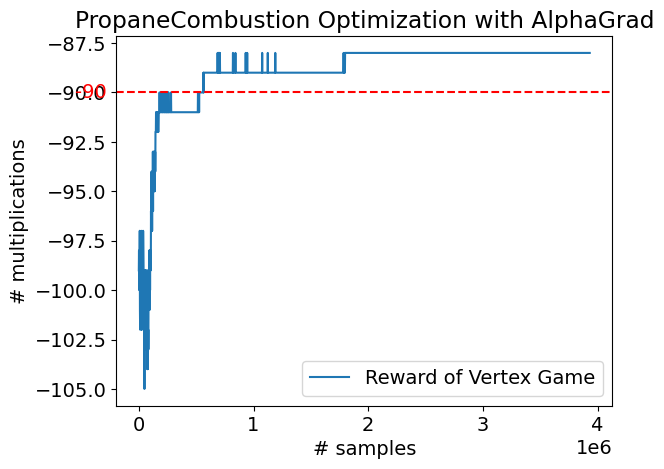

In [2]:
import jax
import jax.numpy as jnp

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("PropaneCombustion_A0_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:, 0]*32*51
num_muls = data[:, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-90., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("PropaneCombustion Optimization with AlphaGrad")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-90., "{:.0f}".format(-90.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend()

In [3]:
import graphax
from graphax import jacve
from graphax.perf import plot_performance
from graphax.examples import PropaneCombustion

In [6]:
order = [12, 51, 33, 45, 10, 9, 42, 39, 1, 18, 27, 8, 61, 60, 48, 59, 36, 35, 
        34, 24, 26, 30, 23, 44, 43, 58, 50, 32, 40, 57, 56, 55, 54, 28, 38, 20, 
        21, 3, 15, 7, 2, 29, 17, 53, 5, 47,  6, 16, 14, 11, 49]

mM_order = [1, 5, 11, 14, 15, 20, 27, 28, 33, 34, 39, 42, 47, 48, 50, 3, 6, 8, 
            10, 16, 18, 21, 23, 24, 26, 29, 32, 35, 38, 43, 44, 49, 53, 55, 57, 
            59, 61, 2, 7, 12, 17, 30, 36, 40, 45, 51, 54, 58, 9, 56, 60]

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 300
2 : 900
3 : 600
5 : 300
6 : 600
7 : 900
8 : 1200
9 : 1500
10 : 1800
11 : 300
12 : 2100
14 : 300
15 : 300
16 : 600
17 : 900
18 : 1200
20 : 300
21 : 600
23 : 600
24 : 600
26 : 600
27 : 600
28 : 300
29 : 600
30 : 900
32 : 600
33 : 600
34 : 300
35 : 600
36 : 900
38 : 600
39 : 600
40 : 900
42 : 300
43 : 600
44 : 600
45 : 900
47 : 300
48 : 300
49 : 600
50 : 600
51 : 900
53 : 600
54 : 900
55 : 1200
56 : 1500
57 : 1800
58 : 2100
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJa

  0%|          | 0/1000 [00:00<?, ?it/s]

61 : 600
60 : 600
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

num_muls: 300
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseT

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 300
5 : 300
11 : 300
14 : 300
15 : 300
20 : 300
27 : 300
28 : 300
33 : 300
34 : 300
39 : 300
42 : 300
47 : 300
48 : 300
50 : 300
3 : 600
6 : 600
8 : 600
10 : 600
16 : 600
18 : 600
21 : 600
23 : 600
24 : 600
26 : 600
29 : 600
32 : 600
35 : 600
38 : 600
43 : 600
44 : 600
49 : 600
53 : 600
55 : 600
57 : 600
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

num_muls: 300
Post: SparseTensor: 
   shape = (300, 3

  0%|          | 0/1000 [00:00<?, ?it/s]

12 : 600
51 : 600
33 : 300
45 : 600
10 : 600
9 : 600
42 : 300
39 : 300
1 : 300
18 : 600
27 : 300
8 : 600
61 : 600
60 : 600
48 : 300
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

Pre: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[300])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

num_muls: 300
Post: SparseTensor: 
   shape = (300, 300),
   out_dims = (SparseDimension(id=0, size=300, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=300, val_dim=0, other_id=0),),
   val = Traced<ShapedAr

100%|██████████| 1000/1000 [00:12<00:00, 77.85it/s]


fwd mean: 10.705554008483887, rev mean: 10.767263412475586, cc_mean: 10.713337898254395, mM_mean: 10.744053840637207
fwd std: 0.42418423295021057, rev std: 0.520680844783783, cc_std: 0.4745213985443115, mM_std: 0.3455398976802826


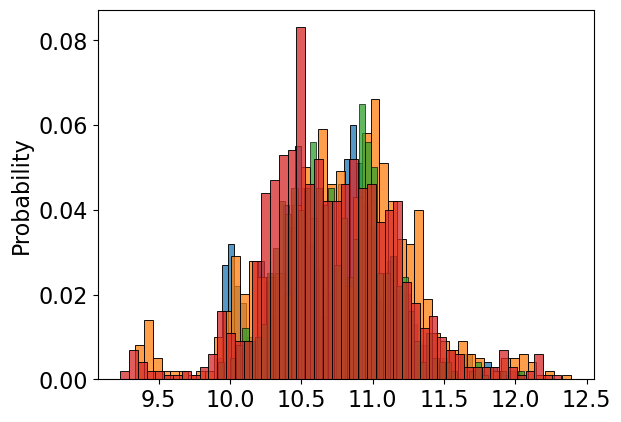

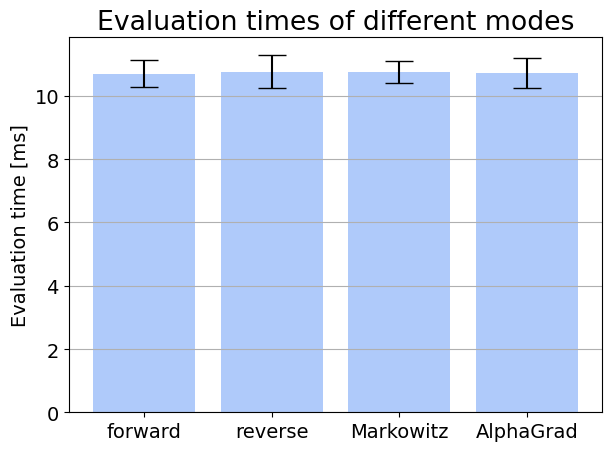

In [18]:
shape = (300,)
xs = [.01]*11
xs = [jnp.ones(shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
plot_performance(PropaneCombustion, xs, order, mM_order, "./RoeFlux.png", samplesize=1000)

### The best result so far
fwd mean: 10.705554008483887, rev mean: 10.767263412475586, cc_mean: 10.713337898254395, mM_mean: 10.744053840637207
fwd std: 0.42418423295021057, rev std: 0.520680844783783, cc_std: 0.4745213985443115, mM_std: 0.3455398976802826

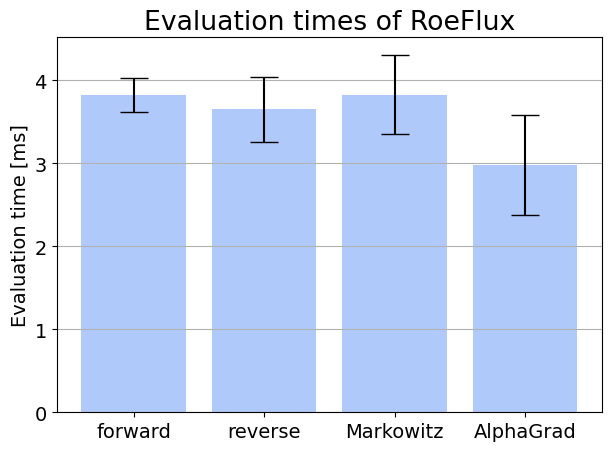

In [33]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()